In [ ]:
#Load dataset dari Kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d aitude/aptos-augmented-images
!ls

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/aitude/aptos-augmented-images
License(s): copyright-authors
100% 2.75G/2.77G [00:32<00:00, 276MB/s]
100% 2.77G/2.77G [00:32<00:00, 91.2MB/s]
aptos-augmented-images.zip  kaggle.json  sample_data


# Preprocessing Data

In [ ]:
# import shutil, os
# shutil.rmtree(r'/content/aptos-augmented-images')

In [ ]:
!unzip /content/aptos-augmented-images.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: aptos-augmented-images/aptos-augmented-images/2/7dd834c00140.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7de7beaf5e9f.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7dee6bf8b9c1.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7df4bb0f86f7.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7e0dc2e2fa5e.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7e6e90a93aa5.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7e9458de5707.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7ea51381ff6a.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7ec1ffe8220b.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7f17e6883f9f.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7f1f77407d32.png  
  inflating: aptos-augmented-images/aptos-augmented-images/2/7f

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [ ]:
test=os.listdir('/content/aptos-augmented-images')
test0=os.listdir('/content/aptos-augmented-images/0')
test1=os.listdir('/content/aptos-augmented-images/2')
test2=os.listdir('/content/aptos-augmented-images/2')
test3=os.listdir('/content/aptos-augmented-images/3')
test4=os.listdir('/content/aptos-augmented-images/4')

print("Total Folder: ",len(test))
print("Class 0: ",len(test0))
print("Class 1: ",len(test1))
print("Class 2: ",len(test2))
print("Class 3: ",len(test3))
print("Class 4: ",len(test4))


Total Folder:  6
Class 0:  2000
Class 1:  2000
Class 2:  2000
Class 3:  2000
Class 4:  2000


In [ ]:
os.rename("/content/aptos-augmented-images/0","/content/aptos-augmented-images/NoDR")
os.rename("/content/aptos-augmented-images/1","/content/aptos-augmented-images/Mild")
os.rename("/content/aptos-augmented-images/2","/content/aptos-augmented-images/Moderate")
os.rename("/content/aptos-augmented-images/3","/content/aptos-augmented-images/Severe")
os.rename("/content/aptos-augmented-images/4","/content/aptos-augmented-images/ProliferativeDR")


In [ ]:
import shutil, os
shutil.rmtree(r'/content/aptos-augmented-images/aptos-augmented-images')
os.remove('/content/aptos-augmented-images.zip')

In [ ]:
image_dir = Path('/content/aptos-augmented-images/')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

Filepath     Label
0  /content/aptos-augmented-images/Mild/dddccdcd5...      Mild
1  /content/aptos-augmented-images/NoDR/24f271c87...      NoDR
2  /content/aptos-augmented-images/Moderate/58529...  Moderate

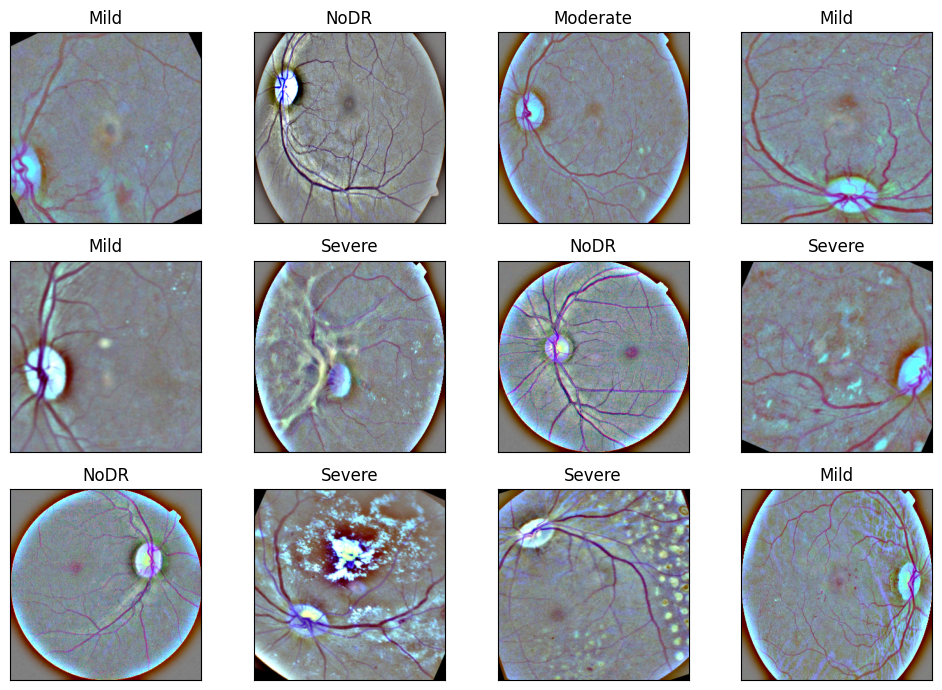

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

/tmp/ipython-input-3111117238.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


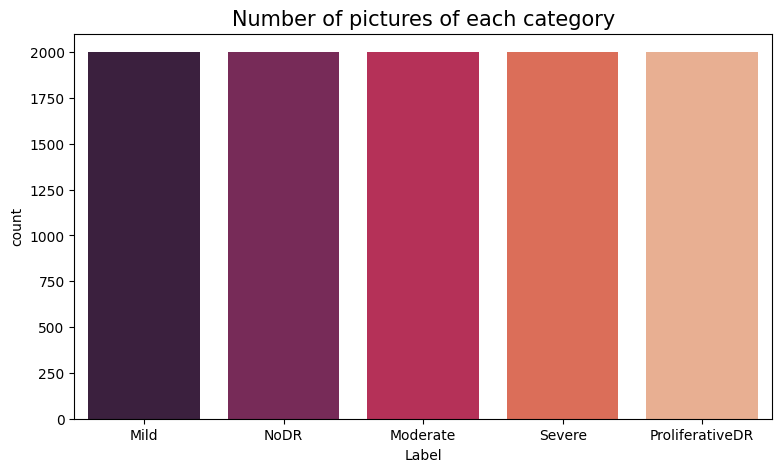

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255,
                                 preprocessing_function=preprocess_input)

train_data = datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=24,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

test_data = val_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=24,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )



Found 8000 validated image filenames belonging to 5 classes.
Found 2000 validated image filenames belonging to 5 classes.


In [ ]:
%matplotlib inline
import os
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # CLAHE để tăng tương phản vùng võng mạc
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    img = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)

    # Mask tròn
    h, w, _ = img.shape
    mask = np.zeros((h, w), np.uint8)
    cv2.circle(mask, (w//2, h//2), min(w, h)//2, 255, -1)
    img = cv2.bitwise_and(img, img, mask=mask)

    # Resize chuẩn EfficientNet
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32) / 255.0
    return img


# Efficient Net B7

In [ ]:
!pip install -q efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 1 and logs.get('val_acc') > 1):
      print("\nStopped! Akurasi Train Validasi sudah mencapai 93%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [ ]:
from tensorflow.keras import layers

def attention_block(inputs):
    # Global Average Pooling để lấy đặc trưng tổng quát
    attn = layers.GlobalAveragePooling2D()(inputs)

    # Học trọng số kênh
    attn = layers.Dense(256, activation='relu')(attn)
    attn = layers.Dense(inputs.shape[-1], activation='sigmoid')(attn)

    # Mở rộng lại thành tensor 4D để nhân với feature map
    attn = layers.Reshape((1, 1, inputs.shape[-1]))(attn)
    attn = layers.Multiply()([inputs, attn])
    return attn


In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import EfficientNetB7

base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224,224,3), pooling=None )


# Attention block
attn_output = attention_block(base_model.output)

inputs = base_model.input


# Global pooling + head
x = tf.keras.layers.GlobalAveragePooling2D()(attn_output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

# Compile
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 66,111,644 (252.20 MB)

 Trainable params: 65,795,285 (250.99 MB)

 Non-trainable params: 316,359 (1.21 MB)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['Label']),
    y=train_df['Label']
)
class_weights = dict(enumerate(class_weights))


In [ ]:
# ===================== PHASE 1: TRAIN BASE MODEL =====================


for layer in model.layers[-200:]:  # mở nhiều lớp hơn
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=test_data,
    steps_per_epoch=int(train_data.n // 16),
    validation_steps=int(test_data.n // 16),
    class_weight=class_weights,
    epochs=20
)

# ===================== FINE-TUNING PHASE =====================

# Mở khóa 50 lớp cuối của EfficientNet-B7 (trừ BatchNorm)
for layer in model.layers[-50:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Giảm learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Huấn luyện tiếp (fine-tune)
fine_cb = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history_fine = model.fit(
    train_data,
    validation_data=test_data,     # ✅ đúng — vì đây là generator tạo từ flow_from_dataframe
    epochs=50,
    class_weight=class_weights,
    callbacks=fine_cb,
    verbose=1
)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
334/500 ━━━━━━━━━━━━━━━━━━━━ 3:02 1s/step - accuracy: 0.4194 - loss: 1.4603

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 689s 827ms/step - accuracy: 0.4470 - loss: 1.3915 - val_accuracy: 0.3345 - val_loss: 1.6055
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 246s 492ms/step - accuracy: 0.6124 - loss: 0.9503 - val_accuracy: 0.3570 - val_loss: 1.9601
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 246s 491ms/step - accuracy: 0.6656 - loss: 0.8116 - val_accuracy: 0.4640 - val_loss: 1.4156
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 246s 491ms/step - accuracy: 0.7330 - loss: 0.7000 - val_accuracy: 0.5205 - val_loss: 1.1863
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 246s 491ms/step - accuracy: 0.7924 - loss: 0.5475 - val_accuracy: 0.7025 - val_loss: 0.7889
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 246s 492ms/step - accuracy: 0.8159 - loss: 0.4790 - val_accuracy: 0.6110 - val_loss: 1.2608
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 247s 492ms/step - accuracy: 0.8479 - loss: 0.4087 - val_accuracy: 0.8035 - val_loss: 0.5022
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 247s 492ms/step - accuracy: 0.8805 - loss: 0.32

In [ ]:
model.save('model_refinetuned_final.h5')
print("✅ Model saved as: model_refinetuned_finally.h5")


✅ Model saved as: model_refinetuned_finally.h5


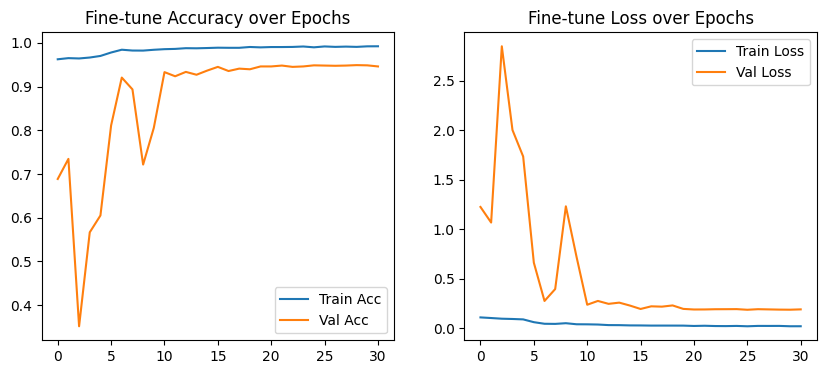

In [ ]:
# --- 7️⃣ Vẽ biểu đồ training process ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Train Acc')
plt.plot(history_fine.history['val_accuracy'], label='Val Acc')
plt.title('Fine-tune Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Val Loss')
plt.title('Fine-tune Loss over Epochs')
plt.legend()
plt.show()

# Plotting Model

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

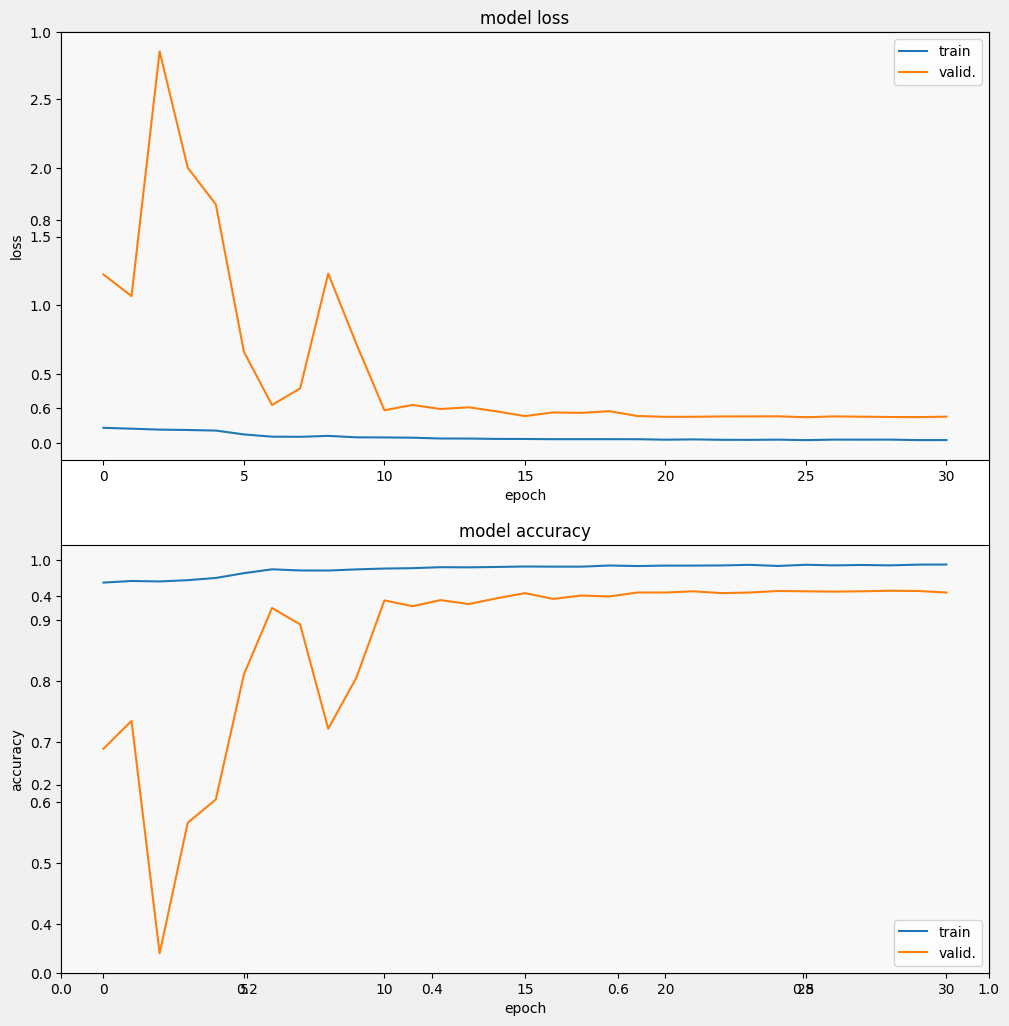

In [ ]:
#display
display_training_curves(
    history_fine.history['loss'],
    history_fine.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_fine.history['accuracy'],
    history_fine.history['val_accuracy'],
    'accuracy', 212)

# Evaluation & Prediction

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

84/84 ━━━━━━━━━━━━━━━━━━━━ 60s 458ms/step
The first 5 predictions: ['Moderate', 'Mild', 'Mild', 'ProliferativeDR', 'NoDR']


In [ ]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

           Mild       0.96      0.94      0.95       394
       Moderate       0.91      0.93      0.92       395
           NoDR       0.98      0.99      0.99       400
ProliferativeDR       0.94      0.95      0.95       412
         Severe       0.96      0.92      0.94       399

       accuracy                           0.95      2000
      macro avg       0.95      0.95      0.95      2000
   weighted avg       0.95      0.95      0.95      2000



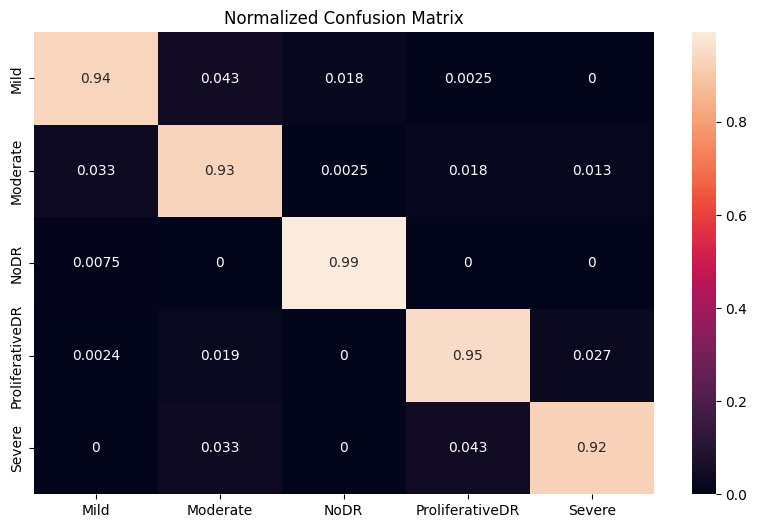

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test Accuracy = 0.95


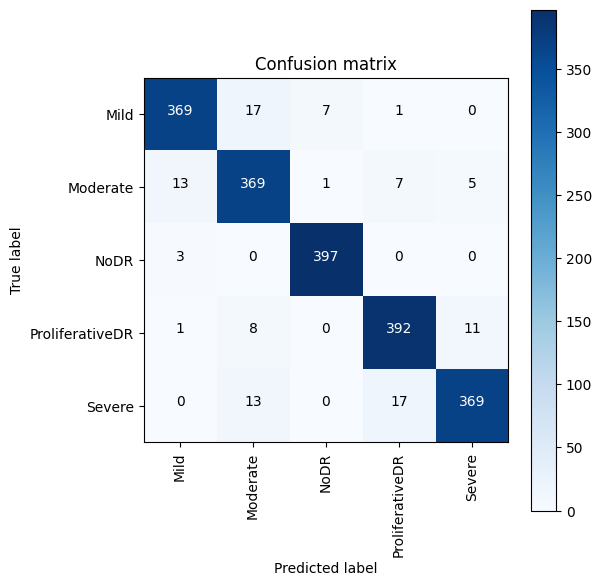

In [ ]:
import itertools
from itertools import chain
from sklearn.metrics import accuracy_score, confusion_matrix

for x_model in [{'name':'EfficientNetB7','history':history,'model':model},]:
    # validate on val set
    accuracy = accuracy_score(y_test, pred)
    print('Test Accuracy = %.2f' % accuracy)

    confusion_mtx = confusion_matrix(y_test, pred)
    cm = plot_confusion_matrix(confusion_mtx, classes = sorted(set(y_test)), normalize=False)

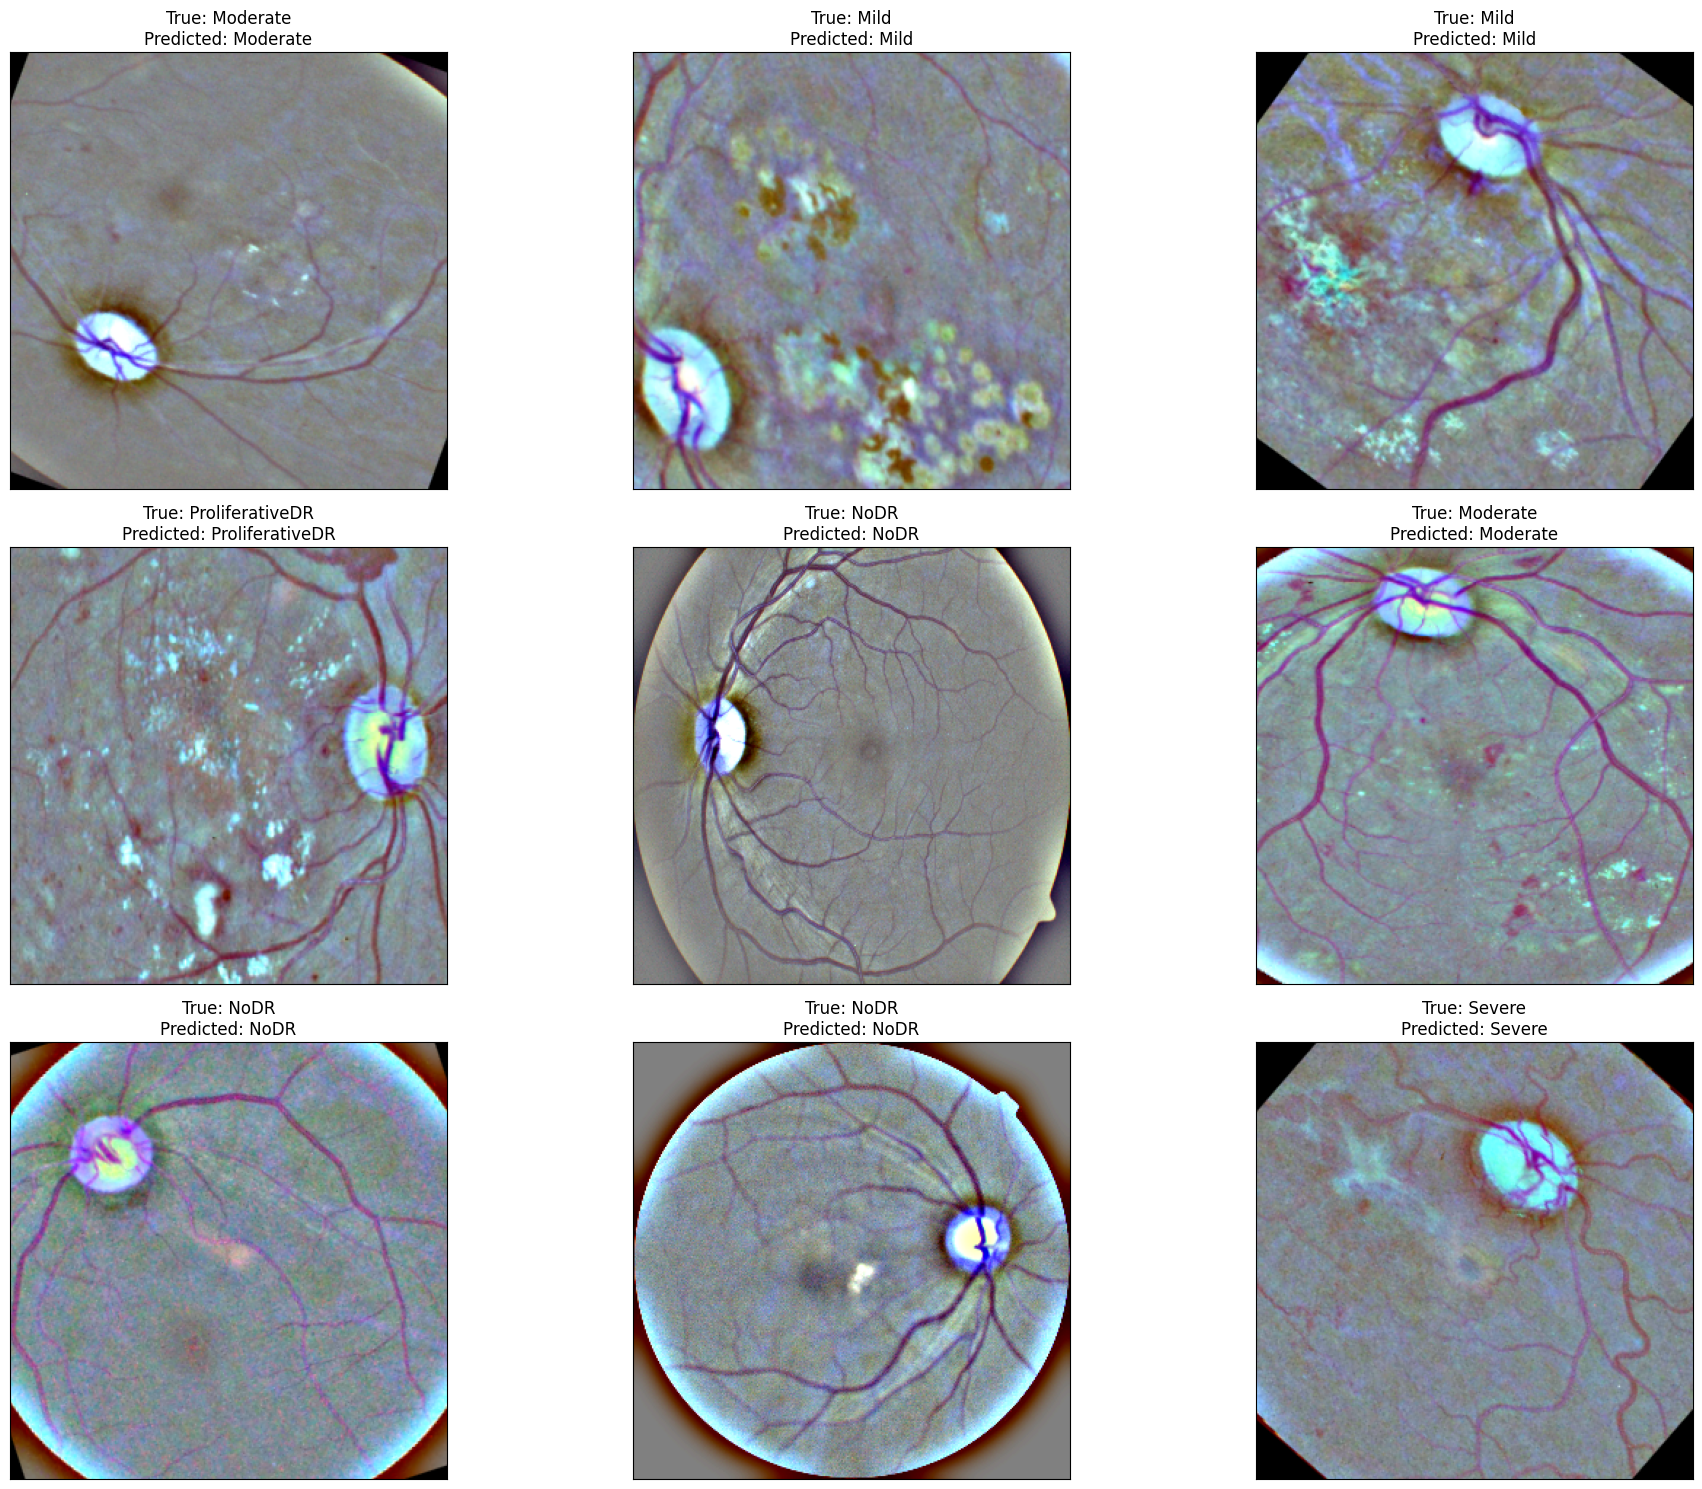

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step


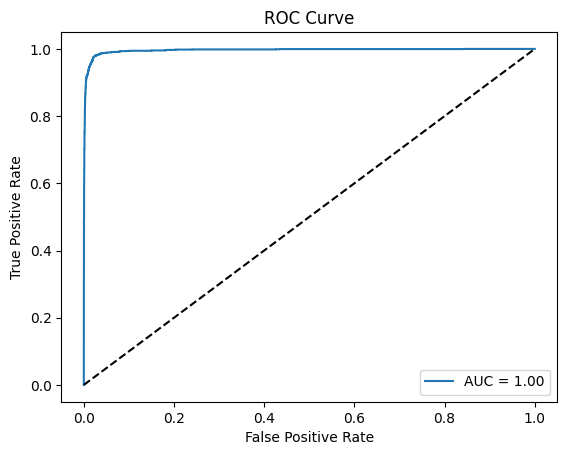

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

num_classes = 5

y_true = test_data.classes
y_pred = model.predict(test_data)
y_true_bin = label_binarize(y_true, classes=range(num_classes))

fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


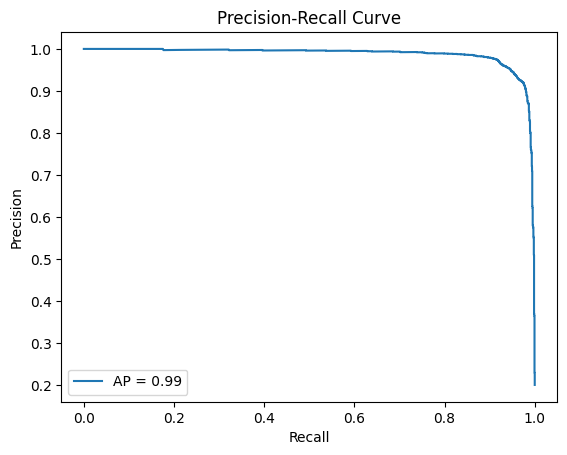

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_true_bin.ravel(), y_pred.ravel())
ap = average_precision_score(y_true_bin, y_pred)

plt.plot(recall, precision, label=f'AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


---- Inference speed summary ----
Measured on 20 batch(es), total images = 480
Total prediction time: 5.2343 s
Average per batch    : 0.2617 s
Average per image    : 0.010905 s
Throughput (images/s): 91.70 img/s
---------------------------------


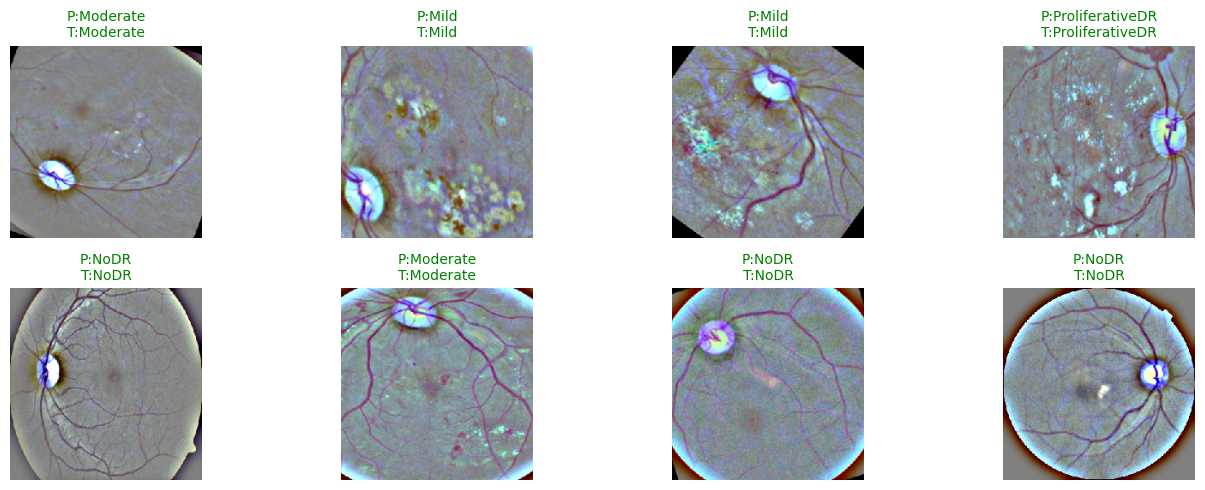

In [ ]:
# ======= ĐO TỐC ĐỘ DỰ ĐOÁN CHO model SỬ DỤNG test_data (flow_from_dataframe) =======
import time
import numpy as np
import math
import matplotlib.pyplot as plt

# Số batch dùng để đo (tăng để có số liệu ổn định hơn)
NUM_BATCHES = 20

# Nếu generator đang ở vị trí giữa chừng, reset để đo từ đầu (ImageDataGenerator flow_from_dataframe)
try:
    test_data.reset()   # reset iterator (cẩn thận: chỉ tồn tại cho Keras generator)
except Exception:
    pass

# Warm-up run (loại chi phí khởi tạo, lần chạy đầu thường chậm)
try:
    batch_images, batch_labels = next(test_data)
except StopIteration:
    # nếu generator hết, reset rồi lấy lại
    test_data.reset()
    batch_images, batch_labels = next(test_data)

_ = model.predict(batch_images, verbose=0)  # warm-up

# Thu thập thời gian cho NUM_BATCHES batch (hoặc ít hơn nếu generator nhỏ)
times = []
n_images_total = 0
batches_done = 0

# đảm bảo test_data không shuffle (trong bạn flow_from_dataframe có shuffle=False)
for i in range(NUM_BATCHES):
    try:
        imgs, lbls = next(test_data)
    except StopIteration:
        # nếu generator hết dữ liệu, reset và tiếp tục
        test_data.reset()
        imgs, lbls = next(test_data)
    start = time.perf_counter()
    preds = model.predict(imgs, verbose=0)
    end = time.perf_counter()

    elapsed = end - start
    times.append(elapsed)
    n_images_total += imgs.shape[0]
    batches_done += 1

# Thống kê
total_time = sum(times)
avg_time_per_batch = total_time / batches_done
avg_time_per_image = total_time / n_images_total
images_per_sec = 1.0 / avg_time_per_image if avg_time_per_image > 0 else math.inf
std_per_image = (np.std(times) / np.mean([b.shape[0] for b in [imgs]]) ) if batches_done>1 else 0

print("---- Inference speed summary ----")
print(f"Measured on {batches_done} batch(es), total images = {n_images_total}")
print(f"Total prediction time: {total_time:.4f} s")
print(f"Average per batch    : {avg_time_per_batch:.4f} s")
print(f"Average per image    : {avg_time_per_image:.6f} s")
print(f"Throughput (images/s): {images_per_sec:.2f} img/s")
print("---------------------------------")

# TÙY CHỌN: hiển thị vài ảnh đầu và nhãn dự đoán
# Lưu ý: test_data.class_indices là dict {class_name: index}
try:
    # map index -> class name
    idx2class = {v:k for k,v in test_data.class_indices.items()}
except Exception:
    idx2class = None

# Hiển thị 8 ảnh cùng nhãn dự đoán / nhãn thật
num_display = 8
test_data.reset()
imgs, lbls = next(test_data)  # lấy batch đầu
preds = model.predict(imgs, verbose=0)
pred_idxs = np.argmax(preds, axis=1)
true_idxs = np.argmax(lbls, axis=1)

plt.figure(figsize=(14, 5))
for i in range(min(num_display, imgs.shape[0])):
    plt.subplot(2, 4, i+1)
    # Nếu imgs là float trong [0,1], chuyển sang uint8 để hiển thị
    img_to_show = imgs[i]
    if img_to_show.dtype != np.uint8:
        img_to_show = (np.clip(img_to_show, 0, 1) * 255).astype('uint8')
    plt.imshow(img_to_show)
    pt = f"P:{pred_idxs[i]}"
    tt = f"T:{true_idxs[i]}"
    if idx2class:
        pt = f"P:{idx2class[pred_idxs[i]]}"
        tt = f"T:{idx2class[true_idxs[i]]}"
    color = "green" if pred_idxs[i] == true_idxs[i] else "red"
    plt.title(f"{pt}\n{tt}", color=color, fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------
# 1. Attention block (exact)
# ---------------------------
from tensorflow.keras import layers
def attention_block(inputs):
    # inputs: 4D tensor (batch, h, w, c)
    attn = layers.GlobalAveragePooling2D(name="attn_gap")(inputs)          # -> (batch, c)
    attn = layers.Dense(256, activation='relu', name="attn_fc1")(attn)    # -> (batch, 256)
    attn = layers.Dense(int(inputs.shape[-1]), activation='sigmoid', name="attn_fc2")(attn)  # -> (batch, c)
    attn = layers.Reshape((1,1,int(inputs.shape[-1])), name="attn_reshape")(attn)            # -> (batch,1,1,c)
    attn = layers.Multiply(name="attn_scale")([inputs, attn])              # -> (batch,h,w,c)
    return attn

# ---------------------------
# 2. Build model (exact same as notebook)
# ---------------------------
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Input
from tensorflow.keras.models import Model
import tensorflow as tf

input_shape = (224,224,3)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape, pooling=None)
# apply attention to backbone output
attn_output = attention_block(base_model.output)

# head
x = GlobalAveragePooling2D(name="head_gap")(attn_output)
x = BatchNormalization(name="head_bn1")(x)
x = Dropout(0.4, name="head_dropout1")(x)
x = Dense(256, activation='relu', name="head_dense1")(x)
x = BatchNormalization(name="head_bn2")(x)
x = Dropout(0.3, name="head_dropout2")(x)
x = Dense(128, activation='relu', name="head_dense2")(x)
outputs = Dense(5, activation='softmax', name="head_logits")(x)

model = Model(inputs=base_model.input, outputs=outputs, name="EffNetB7_Attn_Head")

# Compile as in notebook (you can recompile later for fine-tune)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# print summary
model.summary()


Model: "EffNetB7_Attn_Head"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 66,111,644 (252.20 MB)

 Trainable params: 65,795,285 (250.99 MB)

 Non-trainable params: 316,359 (1.21 MB)

In [ ]:
import pandas as pd
rows = []
for i, layer in enumerate(model.layers):
    # layer.output_shape có thể là list/tuple or None
    try:
        out_shape = layer.output_shape
    except Exception:
        out_shape = None
    rows.append({
        "index": i,
        "name": layer.name,
        "class": layer.__class__.__name__,
        "output_shape": str(out_shape),
        "params": layer.count_params(),
        "trainable": layer.trainable
    })

df_layers = pd.DataFrame(rows)
df_layers.to_csv("model_layers.csv", index=False)
print("Saved model_layers.csv (open to inspect).")
df_layers.head(40)


Saved model_layers.csv (open to inspect).


index                  name                   class output_shape  params  \
0       0         input_layer_1              InputLayer         None       0   
1       1           rescaling_2               Rescaling         None       0   
2       2       normalization_1           Normalization         None       7   
3       3           rescaling_3               Rescaling         None       0   
4       4         stem_conv_pad           ZeroPadding2D         None       0   
5       5             stem_conv                  Conv2D         None    1728   
6       6               stem_bn      BatchNormalization         None     256   
7       7       stem_activation              Activation         None       0   
8       8        block1a_dwconv         DepthwiseConv2D         None     576   
9       9            block1a_bn      BatchNormalization         None     256   
10     10    block1a_activation              Activation         None       0   
11     11    block1a_se_squeeze  GlobalAveragePooling2D         None       0   
12     12    block1a_se_reshape                 Reshape         None       0   
13     13     block1a_se_reduce                  Conv2D         None    1040   
14     14     block1a_se_expand                  Conv2D         None    1088   
15     15     block1a_se_excite                Multiply         None       0   
16     16  block1a_project_conv                  Conv2D         None    2048   
17     17    block1a_project_bn      BatchNormalization         None     128   
18     18        block1b_dwconv         DepthwiseConv2D         None     288   
19     19            block1b_bn      BatchNormalization         None     128   
20     20    block1b_activation              Activation         None       0   
21     21    block1b_se_squeeze  GlobalAveragePooling2D         None       0   
22     22    block1b_se_reshape                 Reshape         None       0   
23     23     block1b_se_reduce                  Conv2D         None     264   
24     24     block1b_se_expand                  Conv2D         None     288   
25     25     block1b_se_excite                Multiply         None       0   
26     26  block1b_project_conv                  Conv2D         None    1024   
27     27    block1b_project_bn      BatchNormalization         None     128   
28     28          block1b_drop                 Dropout         None       0   
29     29           block1b_add                     Add         None       0   
30     30        block1c_dwconv         DepthwiseConv2D         None     288   
31     31            block1c_bn      BatchNormalization         None     128   
32     32    block1c_activation              Activation         None       0   
33     33    block1c_se_squeeze  GlobalAveragePooling2D         None       0   
34     34    block1c_se_reshape                 Reshape         None       0   
35     35     block1c_se_reduce                  Conv2D         None     264   
36     36     block1c_se_expand                  Conv2D         None     288   
37     37     block1c_se_excite                Multiply         None       0   
38     38  block1c_project_conv                  Conv2D         None    1024   
39     39    block1c_project_bn      BatchNormalization         None     128   

    trainable  
0        True  
1        True  
2        True  
3        True  
4        True  
5        True  
6        True  
7        True  
8        True  
9        True  
10       True  
11       True  
12       True  
13       True  
14       True  
15       True  
16       True  
17       True  
18       True  
19       True  
20       True  
21       True  
22       True  
23       True  
24       True  
25       True  
26       True  
27       True  
28       True  
29       True  
30       True  
31       True  
32       True  
33       True  
34       True  
35       True  
36       True  
37       True  
38       True  
39       True

In [ ]:
total_params = model.count_params()
trainable_count = sum([layer.count_params() for layer in model.layers if layer.trainable])
non_trainable_count = total_params - trainable_count
print(f"Total params: {total_params:,}")
print(f"Trainable params: {trainable_count:,}")
print(f"Non-trainable params: {non_trainable_count:,}")


Total params: 66,111,644
Trainable params: 66,111,644
Non-trainable params: 0


In [ ]:
last_n = 150
last_layers = df_layers.tail(last_n).reset_index(drop=True)
last_layers[['index','name','class','trainable']].to_csv("last_150_layers.csv", index=False)
print("Saved last_150_layers.csv")
last_layers[['index','name','class','trainable']].head(40)


Saved last_150_layers.csv


index                       name                   class  trainable
0     677                block6h_add                     Add       True
1     678        block6i_expand_conv                  Conv2D       True
2     679          block6i_expand_bn      BatchNormalization       True
3     680  block6i_expand_activation              Activation       True
4     681             block6i_dwconv         DepthwiseConv2D       True
5     682                 block6i_bn      BatchNormalization       True
6     683         block6i_activation              Activation       True
7     684         block6i_se_squeeze  GlobalAveragePooling2D       True
8     685         block6i_se_reshape                 Reshape       True
9     686          block6i_se_reduce                  Conv2D       True
10    687          block6i_se_expand                  Conv2D       True
11    688          block6i_se_excite                Multiply       True
12    689       block6i_project_conv                  Conv2D       True
13    690         block6i_project_bn      BatchNormalization       True
14    691               block6i_drop                 Dropout       True
15    692                block6i_add                     Add       True
16    693        block6j_expand_conv                  Conv2D       True
17    694          block6j_expand_bn      BatchNormalization       True
18    695  block6j_expand_activation              Activation       True
19    696             block6j_dwconv         DepthwiseConv2D       True
20    697                 block6j_bn      BatchNormalization       True
21    698         block6j_activation              Activation       True
22    699         block6j_se_squeeze  GlobalAveragePooling2D       True
23    700         block6j_se_reshape                 Reshape       True
24    701          block6j_se_reduce                  Conv2D       True
25    702          block6j_se_expand                  Conv2D       True
26    703          block6j_se_excite                Multiply       True
27    704       block6j_project_conv                  Conv2D       True
28    705         block6j_project_bn      BatchNormalization       True
29    706               block6j_drop                 Dropout       True
30    707                block6j_add                     Add       True
31    708        block6k_expand_conv                  Conv2D       True
32    709          block6k_expand_bn      BatchNormalization       True
33    710  block6k_expand_activation              Activation       True
34    711             block6k_dwconv         DepthwiseConv2D       True
35    712                 block6k_bn      BatchNormalization       True
36    713         block6k_activation              Activation       True
37    714         block6k_se_squeeze  GlobalAveragePooling2D       True
38    715         block6k_se_reshape                 Reshape       True
39    716          block6k_se_reduce                  Conv2D       True